In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns

In [11]:
# Load the data
file = "data/dengue/hdx/doh-epi-dengue-cases-2016.csv"
df = pd.read_csv(file, skiprows=[1,2])
df.head()

,loc,cases,deaths,date,Region,year
0,ALBAY,13,0,17/01/2016,REGION V-BICOL REGION,2016
1,ALBAY,9,0,24/01/2016,REGION V-BICOL REGION,2016
2,ALBAY,14,0,31/01/2016,REGION V-BICOL REGION,2016
3,ALBAY,9,0,07/02/2016,REGION V-BICOL REGION,2016
4,ALBAY,17,0,14/02/2016,REGION V-BICOL REGION,2016


In [12]:
df.info()
# Fix data type of column
numerical_columns = ['cases', 'deaths']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   loc     6328 non-null   object
 1   cases   6328 non-null   int64 
 2   deaths  6328 non-null   int64 
 3   date    6328 non-null   object
 4   Region  6328 non-null   object
 5   year    6328 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 296.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   loc     6328 non-null   object        
 1   cases   6328 non-null   int64         
 2   deaths  6328 non-null   int64         
 3   date    6328 non-null   datetime64[ns]
 4   Region  6328 non-null   object        
 5   year    6328 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 296.8+ KB


In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6328   │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ cases           │    0 │      0 │    33.11 │   57.39 │      0 │      5 │     14 │     37 │   934 │    ▇    │  │
│ │ deaths          │    0 │      0 │    1.284 │   9.503 │      0 │      0 │      0 │      0 │   205 │    ▇    │  │
│ │ year            │    0 │      0 │     2016 │       0 │   2016 │   2016 │   2016 │   2016 │  2016 │     ▇   │  │
│ └─────────────────┴──────┴────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2016-01-10      │     2016-12-25      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ loc                       │       0 │          0 │                          1.8 │                    11181 │  │
│ │ Region                    │       0 │          0 │                          2.5 │                    15772 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

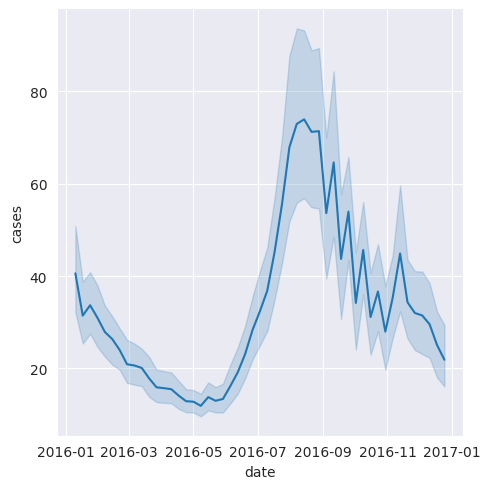

In [14]:
sns.relplot(data=df, x='date', y='cases', kind='line')

In [15]:
# filter the dataset to contain only those in region VI
df_vi = df[df['Region'].str.contains('VI')]
df_vi

,loc,cases,deaths,date,Region,year
1988,AKLAN,50,0,2016-01-10,REGION VI-WESTERN VISAYAS,2016
1989,AKLAN,32,0,2016-01-17,REGION VI-WESTERN VISAYAS,2016
1990,AKLAN,32,0,2016-01-24,REGION VI-WESTERN VISAYAS,2016
1991,AKLAN,22,0,2016-01-31,REGION VI-WESTERN VISAYAS,2016
1992,AKLAN,27,0,2016-02-07,REGION VI-WESTERN VISAYAS,2016
...,...,...,...,...,...,...
3156,TACLOBAN,0,0,2016-11-27,REGION VII-EASTERN VISAYAS,2016
3157,TACLOBAN,1,0,2016-12-04,REGION VII-EASTERN VISAYAS,2016
3158,TACLOBAN,4,0,2016-12-11,REGION VII-EASTERN VISAYAS,2016
3159,TACLOBAN,1,0,2016-12-18,REGION VII-EASTERN VISAYAS,2016


In [16]:
# filter to only contain iloilo
df_iloilo = df_vi[df_vi['loc'].str.lower().str.contains('iloilo')]
df_iloilo

,loc,cases,deaths,date,Region,year
2243,ILOILO,41,1,2016-01-10,REGION VI-WESTERN VISAYAS,2016
2244,ILOILO,53,0,2016-01-17,REGION VI-WESTERN VISAYAS,2016
2245,ILOILO,57,0,2016-01-24,REGION VI-WESTERN VISAYAS,2016
2246,ILOILO,65,0,2016-01-31,REGION VI-WESTERN VISAYAS,2016
2247,ILOILO,53,0,2016-02-07,REGION VI-WESTERN VISAYAS,2016
...,...,...,...,...,...,...
2340,ILOILO CITY,17,0,2016-11-27,REGION VI-WESTERN VISAYAS,2016
2341,ILOILO CITY,14,0,2016-12-04,REGION VI-WESTERN VISAYAS,2016
2342,ILOILO CITY,13,0,2016-12-11,REGION VI-WESTERN VISAYAS,2016
2343,ILOILO CITY,4,0,2016-12-18,REGION VI-WESTERN VISAYAS,2016


In [17]:
import jsonlines

with jsonlines.open('weather_data.jsonl') as reader:
    for obj in reader:
        print(obj)

{'dt': 1293811200, 'sunrise': 1293833259, 'sunset': 1293874683, 'temp': 298.61, 'feels_like': 299.61, 'pressure': 1008, 'humidity': 92, 'dew_point': 297.21, 'clouds': 99, 'wind_speed': 3.81, 'wind_deg': 31, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]}
{'dt': 1293897600, 'sunrise': 1293919682, 'sunset': 1293961115, 'temp': 298.52, 'feels_like': 299.49, 'pressure': 1009, 'humidity': 91, 'dew_point': 296.94, 'clouds': 100, 'wind_speed': 6.7, 'wind_deg': 39, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'rain': {'1h': 0.63}}
{'dt': 1293984000, 'sunrise': 1294006105, 'sunset': 1294047547, 'temp': 298.21, 'feels_like': 299.15, 'pressure': 1011, 'humidity': 91, 'dew_point': 296.64, 'clouds': 100, 'wind_speed': 6.29, 'wind_deg': 38, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'rain': {'1h': 0.17}}
{'dt': 1294070400, 'sunrise': 1294092527, 'sunset': 1294133979, 'temp

In [21]:
import pandas as pd

df_rain = pd.read_json('weather_data.jsonl', lines=True)
df_rain.head()

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,weather,rain
0,1293811200,1293833259,1293874683,298.61,299.61,1008,92,297.21,99,3.81,31,"[{'id': 804, 'main': 'Clouds', 'description': ...",NaN
1,1293897600,1293919682,1293961115,298.52,299.49,1009,91,296.94,100,6.70,39,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.63}
2,1293984000,1294006105,1294047547,298.21,299.15,1011,91,296.64,100,6.29,38,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.17}
3,1294070400,1294092527,1294133979,297.98,298.82,1011,88,295.86,31,7.56,34,"[{'id': 802, 'main': 'Clouds', 'description': ...",NaN
4,1294156800,1294178948,1294220412,298.23,299.04,1011,86,295.72,73,6.60,35,"[{'id': 803, 'main': 'Clouds', 'description': ...",NaN


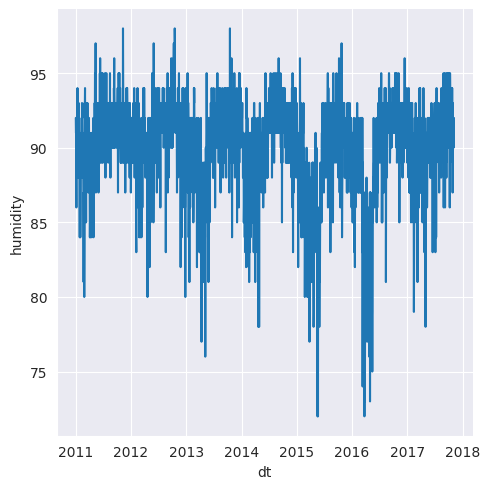

In [24]:
df_rain['dt'] = pd.to_datetime(df_rain['dt'], unit='s')
sns.relplot(data=df_rain, x='dt', y='humidity', kind='line')